# Graphs

Visualization of graphs as SVG images.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor, load_netset
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

In [25]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels = graph.labels

**Visualization**

In [34]:
image = svg_graph(adjacency, position, labels=labels, scale=3, node_size=30)

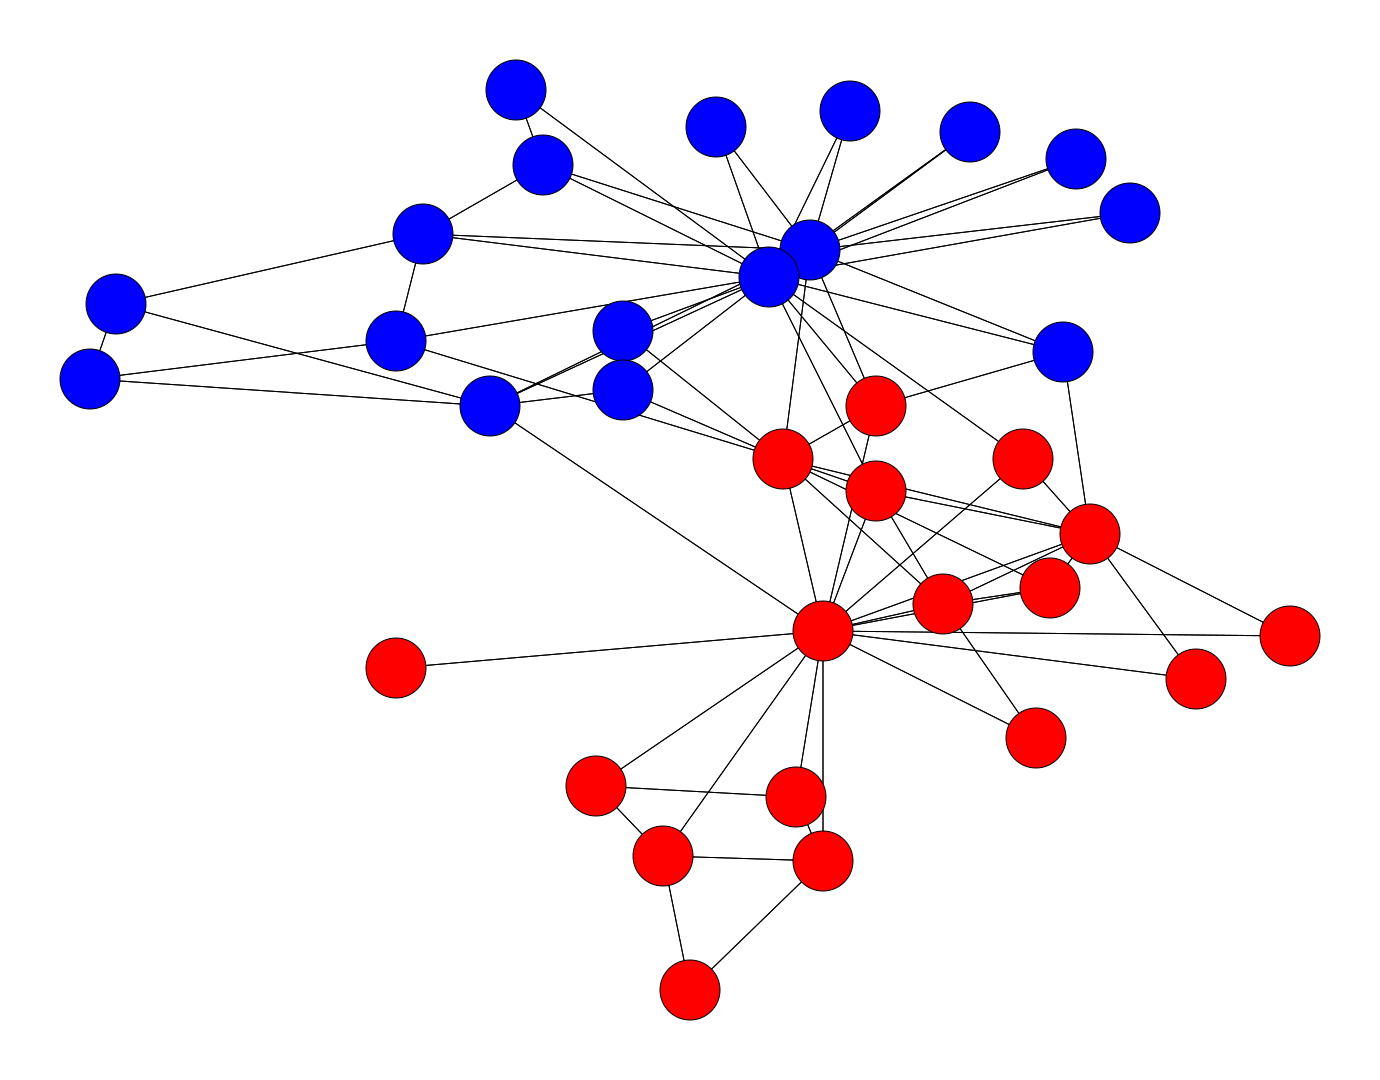

In [35]:
SVG(image)

**Export**

In [7]:
svg_graph(adjacency, position, labels=labels, filename='karate_club')

'<svg width="440" height="340" xmlns="http://www.w3.org/2000/svg">\n<path stroke-width="1" stroke="black" d="M 264 200 353 168"/>\n<path stroke-width="1" stroke="black" d="M 20 116 153 125"/>\n<path stroke-width="1" stroke="black" d="M 28 91 131 68"/>\n<path stroke-width="1" stroke="black" d="M 28 91 20 116"/>\n<path stroke-width="1" stroke="black" d="M 28 91 153 125"/>\n<path stroke-width="1" stroke="black" d="M 162 20 171 45"/>\n<path stroke-width="1" stroke="black" d="M 162 20 246 82"/>\n<path stroke-width="1" stroke="black" d="M 122 103 251 143"/>\n<path stroke-width="1" stroke="black" d="M 122 103 131 68"/>\n<path stroke-width="1" stroke="black" d="M 122 103 20 116"/>\n<path stroke-width="1" stroke="black" d="M 122 103 246 82"/>\n<path stroke-width="1" stroke="black" d="M 197 120 251 143"/>\n<path stroke-width="1" stroke="black" d="M 197 120 153 125"/>\n<path stroke-width="1" stroke="black" d="M 197 120 246 82"/>\n<path stroke-width="1" stroke="black" d="M 171 45 131 68"/>\n<path 

**Degrees**

In [8]:
image = svg_graph(adjacency, position, labels=labels, display_node_weight=True)

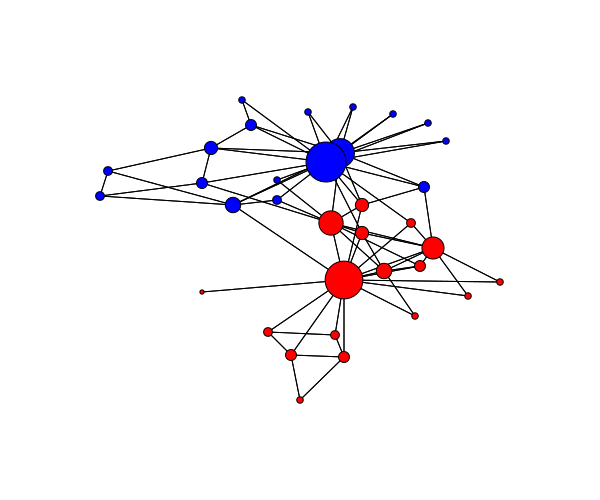

In [9]:
SVG(image)

**Scores**

In [10]:
degrees = adjacency.dot(np.ones(adjacency.shape[0]))

In [11]:
image = svg_graph(adjacency, position, scores=degrees)

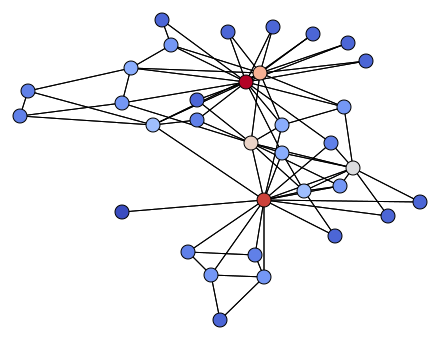

In [12]:
SVG(image)

**Seeds**

In [13]:
seeds = list(np.argsort(-degrees)[:2])

In [14]:
image = svg_graph(adjacency, position, labels=labels, seeds=seeds)

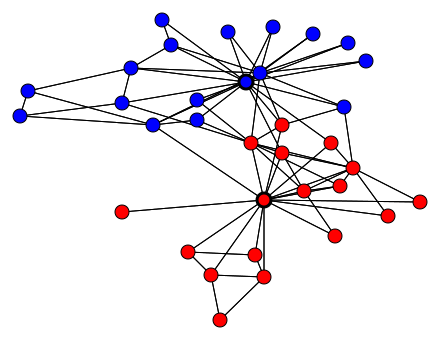

In [15]:
SVG(image)

**No edges**

In [16]:
graph = load_netset('openflights')
adjacency = graph.adjacency
position = graph.position

In [17]:
weights = adjacency.dot(np.ones(adjacency.shape[0]))

In [18]:
image = svg_graph(adjacency, position, scores=np.log(weights), node_order=np.argsort(weights), 
                  node_size_min=2, node_size_max=10, height=400, width=800, 
                  display_node_weight=True, display_edges=False)

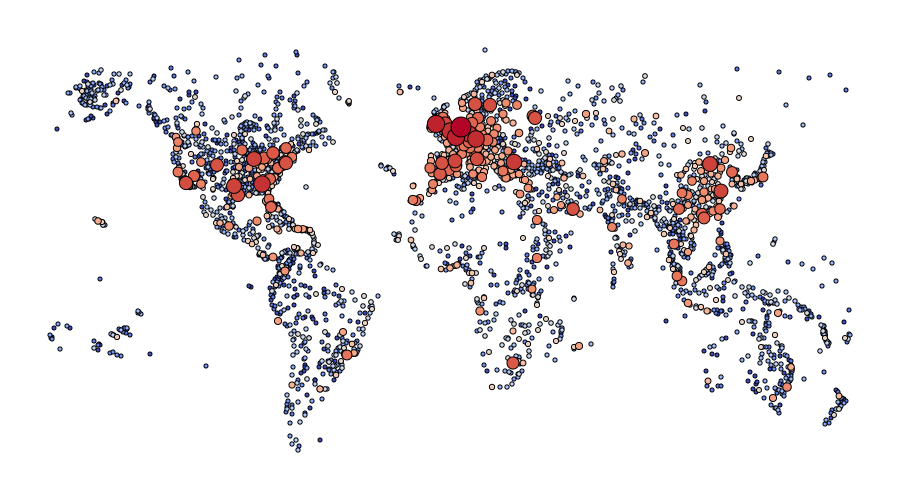

In [19]:
SVG(image)

## Digraphs

In [20]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [21]:
image = svg_digraph(adjacency, position, names)

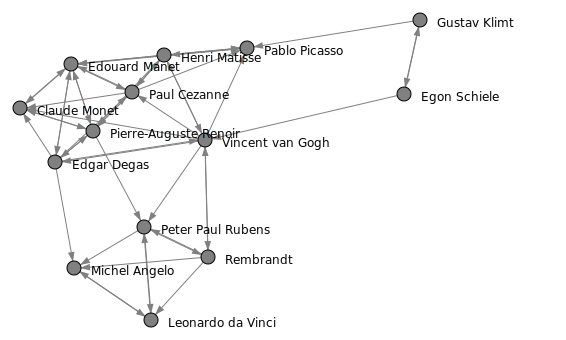

In [22]:
SVG(image)

## Bigraphs

In [23]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [24]:
# default layout
image = svg_bigraph(biadjacency, names_row, names_col, color_row='blue', color_col='red')

TypeError: rescale() missing 1 required positional argument: 'display_node_weight'

In [ ]:
SVG(image)

In [ ]:
# keep original order of rows and columns
image = svg_bigraph(biadjacency, names_row, names_col=names_col, color_row='blue', color_col='red', 
                    reorder=False)

In [ ]:
SVG(image)